In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint


### Lotka-Volterra differential equations
$$\frac{dx}{dt} = \alpha{x} - \beta{x}{y}$$
$$\frac{dy}{dt} = \gamma{x}{y} - \delta{y}$$

where $\frac{dx}{dt}$ is the instantaneous rate of change in $x$ and $\frac{dy}{dt}$ is the rate of change in $y$.  For $x$, this rate of change is a function of the state of $x$ (degree of which is controlled by parameter $\alpha$; i.e., exponential growth of $x$ over time), subtracted by the state of $x$ multiplied by the state of $y$ (degree of which is controlled by parameter $\beta$; i.e., a decrease with more $x$ and $y$ available in a given state of the system). In other words, $x$ increases exponentially but this increase is stopped and reduced by the presence of $y$, which itself increases with more $x$ (see second equation). For $y$, its rate of change is controlled by how many $x$ are available though it is also negatively affected by how many $y$ there are. 

More concretely, if $x$ is large, $y$ will start to subsequently increase, which in turn will bring down $x$, which will then in turn bring down $y$ because there aren't enough $x$ left. This process will repeat with $x$ increasing again. 

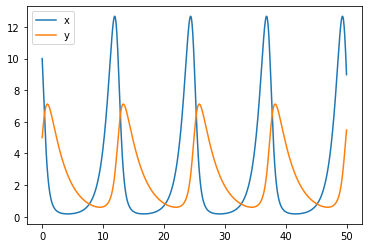

In [4]:
# Set parameter values
a = 1
b = .38
c = .13
d = .38

# Set initial conditions
x0 = 10
y0 = 5
X0 = [x0, y0]

# Set range of time
Nt = 1000
tmax = 50
t = np.linspace(0, tmax, Nt)

# Define ODE
def lvdiffeq(X, t, a, b, c, d):
    x, y, = X # Initial conditions
    dxdt = (a*x) - (b*x*y)
    dydt = (c*x*y) - (d*y)
    return np.array([dxdt, dydt])
    
result = odeint(lvdiffeq, X0, t, args = (a, b, c, d))
x, y = result.T

plt.plot(t, x, label = 'x')
plt.plot(t, y, label = 'y')
plt.legend()
plt.show()



### Exponential growth and exponential decay differential equations

That is, 
$$\frac{dx}{dt} = \alpha{x}$$
and
$$\frac{dx}{dt} = -\alpha{x}$$

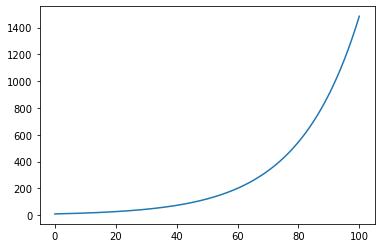

In [6]:
## Exponential growth
# Set parameter values
a = .05 

# Set initial condition
x0 = 10

# Set range of time
Nt = 1000
tmax = 100
t = np.linspace(0, tmax, Nt)

# Define ODE
def expgrow(X, t, a):
    x = X # Initial condition
    dxdt = (a*x)
    return np.array(dxdt)

# Return values of x over time
result = odeint(expgrow, x0, t, args = (a,))
x = result

plt.plot(t, x)
plt.show()

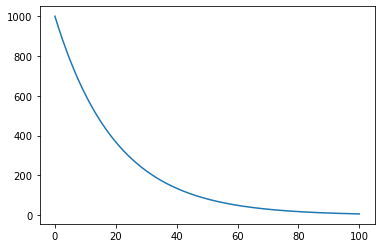

In [7]:
## Exponential decay
# Set parameter values
a = .05

# Set initial condition
x0 = 1000

# Set range of time
Nt = 1000
tmax = 100
t = np.linspace(0, tmax, Nt)

# Define ODE
def expdec(X, t, a):
    x = X # Initial condition
    dxdt = -(a*x)
    return np.array(dxdt)

# Return values of x over time
result = odeint(expdec, x0, t, args = (a,))
x = result

plt.plot(t, x)
plt.show()

### Logistic ODE 

$$\frac{dx}{dt} = \alpha{x}(1 - \frac{x}{b})$$

This equation is saying that $x$ will start to grow exponentially but as $x$ becomes closer and closer to $b$ the growth will slow down, eventually stopping (effectively creating a logistic curve).


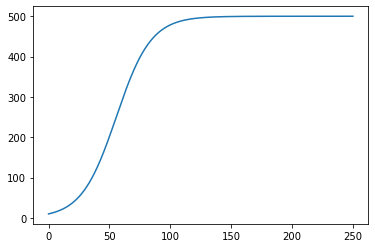

In [8]:
## Logistic growth
# Set parameter values
a = .07 # Setting this larger will cause x to reach its limit quicker
b = 500 

# Set initial condition
x0 = 10

# Set range of time
Nt = 1000
tmax = 250
t = np.linspace(0, tmax, Nt)

# Define ODE
def loggrow(X, t, a, b):
    x = X # Initial condition
    dxdt = a*x * (1 - (x/b))
    return np.array(dxdt)

# Return values of x over time
result = odeint(loggrow, x0, t, args = (a, b))
x = result

plt.plot(t, x)
plt.show()

### Newton's Law of Cooling

$$\frac{dT}{dt} = K(T - A)$$

where $T$ is the temperature of a system at a given point in time, $A$ is the temperature of the system's surroundings, and $K$ determines how quickly the cooling will happen.

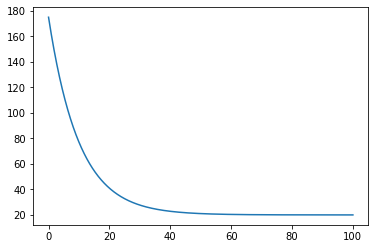

In [9]:
## Newton's Law of Cooling
# Set parameter values
k = -.1
a = 20 # In celsius

# Set initial condition
temp0 = 175 

# Set range of time
Nt = 1000
tmax = 100
t = np.linspace(0, tmax, Nt)

# Define ODE
def cooling(X, t, k, a):
    temp = X # Initial condition
    dTdt = k * (temp - a)
    return np.array(dTdt)

# Return values of T over time
result = odeint(cooling, temp0, t, args = (k, a))
temp = result

plt.plot(t, temp)
plt.show()

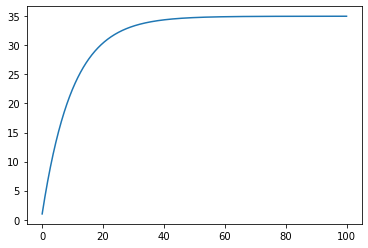

In [10]:
## Newton's Law of Heating
# Set parameter values
k = -.1
a = 35 # In celsius

# Set initial condition
temp0 = 1

# Set range of time
Nt = 1000
tmax = 100
t = np.linspace(0, tmax, Nt)

# Define ODE
def heating(X, t, k, a):
    temp = X # Initial condition
    dTdt = k * (temp - a)
    return np.array(dTdt)

# Return values of T over time
result = odeint(heating, temp0, t, args = (k, a))
temp = result

plt.plot(t, temp)
plt.show()